In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [2]:
# PCA modules
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

In [3]:
# Performance Test
from sklearn.linear_model import LogisticRegression

In [4]:
# Prepare data pre-training
from sklearn.preprocessing import StandardScaler        # Normalize Data
from sklearn.model_selection import train_test_split    # Split data into training and test

In [38]:
# Get Data
heart_disease = pd.read_csv('data/heart_disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [39]:
# Split Data
dt_features = heart_disease.drop(['target'], axis = 1)
dt_target = heart_disease['target']

In [12]:
# Normalize data
dt_features = StandardScaler().fit_transform(dt_features)

In [40]:
# Split train data
X_train, X_test, y_train, y_test = train_test_split(dt_features, 
                                                    dt_target, 
                                                    test_size = 0.3,
                                                    random_state = 42)

In [16]:
# Validating split data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(717, 13)
(308, 13)
(717,)
(308,)


In [20]:
# Setting PCA 
pca = PCA(n_components = 3)
pca.fit(X_train)

PCA(n_components=3)

In [21]:
# Setting IPCA
ipca = IncrementalPCA(n_components = 3, batch_size = 10) # batch_size: IPCA works using blocks to train
ipca.fit(X_train)

IncrementalPCA(batch_size=10, n_components=3)

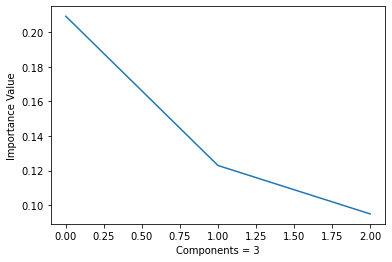

In [31]:
# Mesure variance
plt.plot(range(len(pca.explained_variance_)), pca.explained_variance_ratio_)
plt.xlabel('Components = 3')
plt.ylabel('Importance Value');

In [34]:
# Setting Logistic Regresion
logistic = LogisticRegression(solver = 'lbfgs')

In [37]:
# Getting PCA score
dt_train = pca.transform(X_train)
dt_test = pca.transform(X_test)
logistic.fit(dt_train, y_train)
print('PCA Score: ', logistic.score(dt_test, y_test))

PCA Score:  0.7857142857142857
